# Creation df

In [10]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.utils.data import DataLoader, TensorDataset
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    r2_score,
)
from sklearn.metrics import root_mean_squared_error
import os
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    r2_score,
)
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    r2_score,
)
from itertools import combinations
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import time
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from joblib import dump

In [2]:
df = pd.read_csv("simulation_results_with_pressure_without_early_values.csv")

In [3]:
def plot_predictions_vs_actual(
    y_true, y_pred, save_path="graphes_NN", sample_fraction=0.1
):
    """
    Plots predicted values versus actual values and saves the plot as a PDF.

    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.
        save_path (str): Directory where the PDF file will be saved.
        sample_fraction (float): Fraction of the data to sample for faster plotting.
    """
    # Ensure the directory exists
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Reducing the dataset size if it's too large
    if len(y_true) > 1000:  # Only sample if the dataset is large
        sample_size = int(len(y_true) * sample_fraction)
        indices = np.random.choice(len(y_true), sample_size, replace=False)
        y_true = y_true[indices]
        y_pred = y_pred[indices]

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(y_true, y_pred, alpha=0.7, label="Predicted vs Actual")
    ax.plot(
        [min(y_true), max(y_true)], [min(y_true), max(y_true)], "r--", label="Ideal"
    )
    ax.set_title("Predicted vs Actual Values")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.grid(True)

    # Save the plot as a PDF
    pdf_path = os.path.join(save_path, "predicted_vs_actual.pdf")
    fig.savefig(pdf_path, format="pdf")
    plt.close(fig)  # Close the figure to free memory

    print(f"Graph saved to {pdf_path}")

# Linear Regression

In [4]:
def linear_regression_model(
    df,
    feature_expansion=False,
    regularization=False,
    folder=".",
    alpha=1.0,
    plot_and_save=False,
    plot_coefs=False,
    degree=7,
):
    # Création du dossier si non existant
    if not os.path.exists(folder):
        os.makedirs(folder)

    # Sélection des variables d'entrée et de sortie
    X = df[
        [
            "lhgr",
            "fuel_radius",
            "gap_size",
            "clad_thickness",
            "coolant_temperature",
            "time",
        ]
    ]
    y = df["volAverage(T)"]

    # Standardisation des données pour éviter les problèmes de conditionnement
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Expansion des caractéristiques si activée
    if feature_expansion:
        poly = PolynomialFeatures(
            degree=degree, interaction_only=False, include_bias=False
        )
        X_expanded = poly.fit_transform(X_scaled)
        feature_names = poly.get_feature_names_out(X.columns)
        X_scaled = X_expanded

    # Séparation des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Création du modèle avec régularisation (Ridge) si activée
    if regularization:
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)

    # Calcul de l'erreur MSE et RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Paramètres utilisés dans le graphique
    feature_expansion_str = (
        "Feature Expansion" if feature_expansion else "No Feature Expansion"
    )
    regularization_str = (
        f"Regularization (alpha={alpha})" if regularization else "No Regularization"
    )

    # Plot et sauvegarde des résultats de prédiction si activé
    if plot_and_save:
        plt.figure(figsize=(8, 8))
        plt.scatter(y_test, y_pred, alpha=0.2, label="Predictions")
        plt.plot(
            [y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            color="red",
            linestyle="--",
            label="Ideal line",
        )
        plt.xlabel("Real temperature (K)", fontsize=18)
        plt.ylabel("Predicted temperature (K)", fontsize=18)
        plt.legend(title=f"RMSE: {rmse:.2f} K")
        plt.grid(True)
        plt.tight_layout()

        # Increase the tick label size
        plt.tick_params(axis="both", labelsize=16)  # Adjust '14' as per your preference

        plt.savefig(
            f"{folder}/predictions_vs_true_values_{feature_expansion_str}_{regularization_str}_degree{degree}.pdf"
        )
        plt.show()
        plt.close()

    # Plot et sauvegarde des coefficients si activé
    if plot_coefs:
        coefs = model.coef_
        coef_names = X.columns if not feature_expansion else feature_names

        # Sélection des 15 plus grands coefficients en valeur absolue
        abs_coefs = np.abs(coefs)
        top_15_indices = np.argsort(abs_coefs)[-15:]

        top_15_coefs = coefs[top_15_indices]
        top_15_coef_names = [coef_names[i] for i in top_15_indices]

        plt.figure(figsize=(10, 6))
        plt.barh(top_15_coef_names, top_15_coefs)
        plt.xlabel("Coefficient Value", fontsize=18)
        plt.grid(True)
        plt.tight_layout()

        # Increase the tick label size
        plt.tick_params(axis="both", labelsize=16)  # Adjust '14' as per your preference

        plt.savefig(
            f"{folder}/top_15_model_coefficients_{feature_expansion_str}_{regularization_str}_degree{degree}.pdf"
        )
        plt.show()
        plt.close()

    return model, mse, rmse

In [5]:
def evaluate_rmse_time(df, folder=".", regularization=False, alpha=1.0):
    results = []  # Pour stocker les résultats
    for degree in range(1, 11):  # Degré de 1 à 11
        print(f"Evaluating degree {degree}...")
        start_time = time.time()

        # Appel de la fonction de régression avec l'expansion des caractéristiques
        model, mse, rmse = linear_regression_model(
            df,
            feature_expansion=True,
            regularization=regularization,
            folder=folder,
            alpha=alpha,
            plot_and_save=False,
            plot_coefs=False,
            degree=degree,
        )

        elapsed_time = time.time() - start_time  # Temps de calcul
        print(f"Time for degree {degree}: {elapsed_time:.4f} seconds")

        # Enregistrement des résultats dans la liste
        results.append(
            {"Degree": degree, "RMSE": rmse, "Computation Time": elapsed_time}
        )

        # Sauvegarde dans un fichier CSV
        results_df = pd.DataFrame(results)
        results_df.to_csv(f"{folder}/evaluation_results.csv", index=False)

    # Lecture des résultats et tracé des courbes
    results_df = pd.read_csv(f"{folder}/evaluation_results.csv")

    plt.figure(figsize=(12, 8))

    # Axe principal pour RMSE
    ax1 = plt.gca()
    ax1.plot(
        results_df["Degree"], results_df["RMSE"], label="RMSE", marker="o", color="blue"
    )
    ax1.set_xlabel("Degree of Polynomial Expansion", fontsize=18)
    ax1.set_ylabel("RMSE", fontsize=18, color="blue")
    ax1.tick_params(axis="y", labelcolor="blue", labelsize=18)
    ax1.tick_params(axis="x", labelsize=18)

    # Formatage des axes x pour n'afficher que des entiers
    ax1.set_xticks(np.arange(1, 10, 1))  # Seules les valeurs entières de 1 à 9
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

    # Application de l'échelle logarithmique sur l'axe des RMSE
    ax1.set_yscale("log")

    # Axe secondaire pour le temps de calcul
    ax2 = ax1.twinx()
    ax2.plot(
        results_df["Degree"],
        results_df["Computation Time"],
        label="Computation Time",
        marker="o",
        color="black",
    )
    ax2.set_ylabel("Computation Time (s)", fontsize=18, color="black")
    ax2.tick_params(axis="y", labelcolor="black", labelsize=18)

    # Application de l'échelle logarithmique sur l'axe du temps de calcul
    ax2.set_yscale("log")

    # Formatage des axes y pour les entiers
    ax2.tick_params(axis="y", labelsize=18)

    # Grille pour les entiers seulement
    ax1.grid(True, which="both", axis="x", color="gray", linestyle="-", linewidth=0.5)

    # Titre et légendes
    plt.title(
        "RMSE and Computation Time vs Degree of Polynomial Expansion", fontsize=18
    )
    ax1.legend(loc="upper left", fontsize=18)
    ax2.legend(loc="upper right", fontsize=18)

    plt.tight_layout()
    plt.savefig(f"{folder}/rmse_and_computation_time_vs_degree_log.pdf")
    plt.show()

Mean Squared Error: 1481.1741820995328
Root Mean Squared Error (RMSE): 38.48602580287464


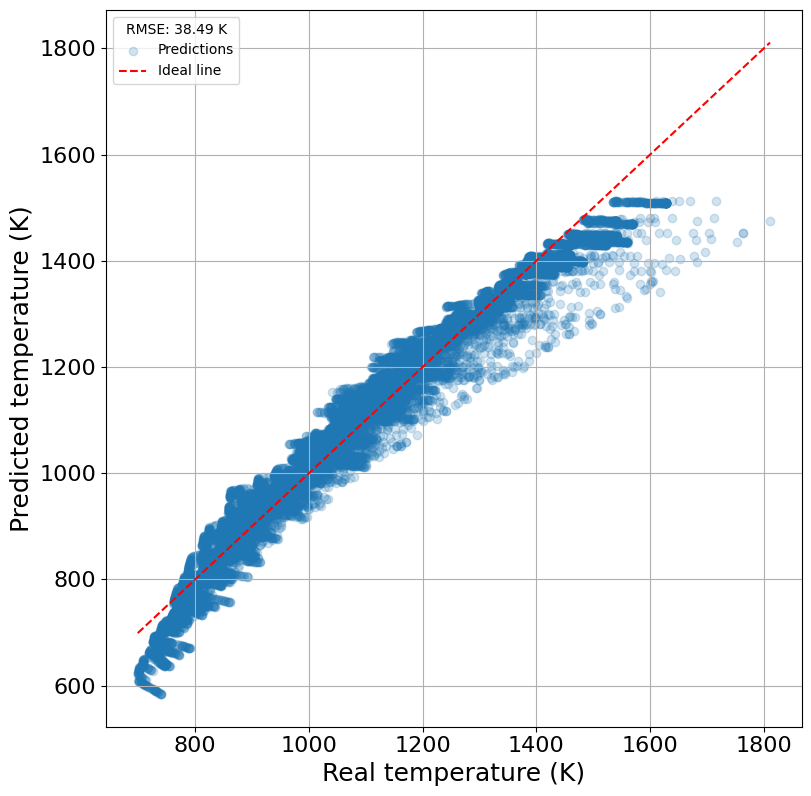

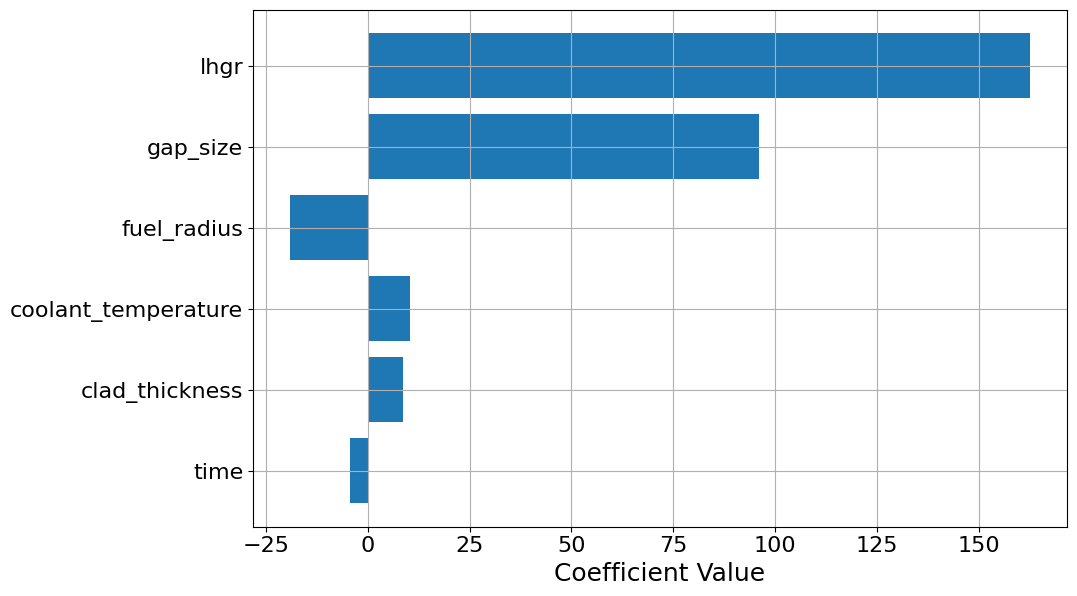

In [ ]:
model, mse, rmse = linear_regression_model(
    df,
    feature_expansion=False,
    regularization=True,
    folder="LR_plots",
    alpha=1.0,
    plot_and_save=True,
    plot_coefs=True,
    degree=1,
)

# Fully connected NN

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_hidden_layers):
        super(NeuralNetwork, self).__init__()
        layers = [nn.Linear(input_size, hidden_size), nn.ReLU()]
        for _ in range(num_hidden_layers - 1):
            layers.extend([nn.Linear(hidden_size, hidden_size), nn.ReLU()])
        layers.append(nn.Linear(hidden_size, 1))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [8]:
def fully_connected_NN(
    df, K, L, num_epochs, lr_init, lr_step, lr_gamma, save_path="model_save"
):
    # Définir les entrées (features) et la sortie (target)
    X = df[
        [
            "lhgr",
            "fuel_radius",
            "gap_size",
            "clad_thickness",
            "coolant_temperature",
            "time",
        ]
    ].values
    y = df["volAverage(T)"].values

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Standardiser les données d'entrée
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convertir les données en tenseurs PyTorch
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    # Initialisation du modèle
    model = NeuralNetwork(
        input_size=X_train_tensor.shape[1], hidden_size=K, num_hidden_layers=L
    )

    # Définir la fonction de perte, l'optimiseur et le scheduler
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr_init)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=lr_step, gamma=lr_gamma)

    # Entraîner le modèle
    train_losses = []
    test_losses = []
    y_pred_all = []  # Liste pour stocker les prédictions
    y_test_all = []  # Liste pour stocker les valeurs réelles

    for epoch in range(num_epochs):
        # Entraînement
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train_tensor)
        loss = criterion(predictions, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Ajuster le learning rate avec le scheduler
        scheduler.step()

        # Évaluation sur l'ensemble de test
        model.eval()
        with torch.no_grad():
            test_predictions = model(X_test_tensor)
            test_loss = criterion(test_predictions, y_test_tensor)

            # Stocker les valeurs réelles et prédites pour le tracé
            y_pred_all.append(test_predictions.numpy().flatten())
            y_test_all.append(y_test_tensor.numpy().flatten())

        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
        print(
            f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}"
        )

    # Convertir les listes en tableaux numpy pour faciliter l'utilisation
    y_pred_all = np.concatenate(y_pred_all)
    y_test_all = np.concatenate(y_test_all)

    # Sauvegarde des informations nécessaires pour utiliser le modèle comme boîte noire
    os.makedirs(save_path, exist_ok=True)
    torch.save(model.state_dict(), os.path.join(save_path, "model.pth"))
    np.save(os.path.join(save_path, "scaler_mean.npy"), scaler.mean_)
    np.save(os.path.join(save_path, "scaler_scale.npy"), scaler.scale_)

    print(f"Modèle et informations sauvegardés dans le dossier : {save_path}")

    # Tracer les learning curves (courbes d'apprentissage)
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_epochs), train_losses, label="Training Loss")
    plt.plot(range(num_epochs), test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Learning Curves")
    plt.legend()
    plt.grid(True)
    plt.yscale("log")
    learning_curve_path = os.path.join(save_path, "learning_curve.pdf")
    plt.savefig(learning_curve_path, format="pdf")
    plt.show()

    # Sélectionner 1000 points au hasard
    indices_aleatoires = np.random.choice(len(y_test_all), 1000, replace=False)
    y_test_sample = y_test_all[indices_aleatoires]
    y_pred_sample = y_pred_all[indices_aleatoires]

    # Tracer la température prédites vs réelle pour les 1000 points choisis
    plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
    bounds = [min(y_test_sample + y_pred_sample), max(y_test_sample + y_pred_sample)]
    plt.plot(bounds, bounds, "r--")
    plt.xlabel("Actual Temperature (K)")
    plt.ylabel("Predicted Temperature (K)")
    plt.title("Predicted vs Actual Temperature")
    temperature_plot_path = os.path.join(save_path, "predicted_vs_real_temperature.pdf")
    plt.savefig(temperature_plot_path, format="pdf")
    plt.grid()
    plt.show()

    # Retourner les résultats pour tracé et analyse
    return model, y_pred_all, y_test_all, train_losses, test_losses

In [9]:
def predict_temperature(params, model_path):
    # Extraire K et L à partir du nom du dossier
    match = re.search(r"K(\d+)_L(\d+)", model_path)
    if not match:
        raise ValueError("Le nom du dossier ne contient pas les informations K et L")

    K = int(match.group(1))
    L = int(match.group(2))

    # Initialisation du modèle avec K et L extraits
    model = NeuralNetwork(input_size=6, hidden_size=K, num_hidden_layers=L)
    model.load_state_dict(
        torch.load(os.path.join(model_path, "model.pth"), weights_only=True)
    )

    # Normalisation des paramètres d'entrée (toujours nécessaire pour les features)
    scaler_mean = np.load(os.path.join(model_path, "scaler_mean.npy"))
    scaler_scale = np.load(os.path.join(model_path, "scaler_scale.npy"))
    params_scaled = (params - scaler_mean) / scaler_scale

    # Convertir les paramètres d'entrée en tenseur PyTorch
    X_input_tensor = torch.tensor(params_scaled, dtype=torch.float32).unsqueeze(
        0
    )  # Ajouter la dimension du batch

    # Prédiction
    model.eval()
    with torch.no_grad():
        y_pred_normalized = model(X_input_tensor).numpy().flatten()

    # Pas de dénormalisation nécessaire, retourner directement la prédiction
    return y_pred_normalized

In [18]:
def cross_validate_NN(
    df,
    K,
    L,
    num_epochs,
    lr_init,
    lr_step,
    lr_gamma,
    cv_folds=5,
    save_path="crossvalidation_NN",
):
    # Séparer le dataset initial
    X = df[
        [
            "lhgr",
            "fuel_radius",
            "gap_size",
            "clad_thickness",
            "coolant_temperature",
            "time",
        ]
    ].values
    y = df["volAverage(T)"].values
    y = df["rodPressure"].values


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Créer le dossier pour sauvegarder les modèles
    os.makedirs(save_path, exist_ok=True)

    # Initialiser les variables pour la validation croisée
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    results = []

    best_model = None
    best_rmse = float("inf")
    best_model_path = None

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        # Préparer les données pour le fold actuel
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        # Standardiser les données
        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)

        # Convertir en tenseurs PyTorch
        X_train_tensor = torch.tensor(X_train_fold_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_fold, dtype=torch.float32).unsqueeze(1)
        X_val_tensor = torch.tensor(X_val_fold_scaled, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val_fold, dtype=torch.float32).unsqueeze(1)

        # Initialiser le modèle
        model = NeuralNetwork(
            input_size=X_train_tensor.shape[1], hidden_size=K, num_hidden_layers=L
        )
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr_init)
        scheduler = optim.lr_scheduler.StepLR(
            optimizer, step_size=lr_step, gamma=lr_gamma
        )

        # Entraîner le modèle
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            predictions = model(X_train_tensor)
            loss = criterion(predictions, y_train_tensor)
            loss.backward()
            optimizer.step()
            scheduler.step()

        # Évaluer le modèle sur l'ensemble de validation
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val_tensor).numpy().flatten()
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            val_mae = mean_absolute_error(y_val_fold, val_predictions)
            val_r2 = r2_score(y_val_fold, val_predictions)

        # Sauvegarder les résultats
        results.append(
            {"fold": fold + 1, "rmse": val_rmse, "mae": val_mae, "r2": val_r2}
        )

        # Sauvegarder le modèle si c'est le meilleur
        model_path = os.path.join(save_path, f"model_fold{fold + 1}.pth")
        torch.save(model.state_dict(), model_path)
        if val_rmse < best_rmse:
            best_rmse = val_rmse
            best_model = model
            best_model_path = model_path

    # Sauvegarder les résultats de la validation croisée
    results_df = pd.DataFrame(results)
    results_df.loc["mean"] = results_df.mean(numeric_only=True)
    results_df.loc["std"] = results_df.std(numeric_only=True)
    results_df.to_csv(
        os.path.join(save_path, "cross_validation_results.csv"), index=False
    )

    # Évaluer le meilleur modèle sur l'ensemble de test
    best_model.load_state_dict(torch.load(best_model_path))
    best_model.eval()
    with torch.no_grad():
        X_test_scaled = scaler.transform(X_test)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
        test_predictions = best_model(X_test_tensor).numpy().flatten()
        test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_r2 = r2_score(y_test, test_predictions)

    print(
        f"Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}, Test R²: {test_r2:.4f}"
    )
    return best_model, test_rmse, test_mae, test_r2

In [16]:
K = 15
L = 3
num_epochs = 5000
lr_init = 0.2
lr_step = num_epochs // 3  # mise à jour du learning rate tous les lr_step epochs
lr_gamma = 0.2  # le learning rate en multiplié par cette valeur tous les lr_step epochs

save_path = f"model_save_K{K}_L{L}_num_epochs{num_epochs}_lrinit{lr_init}_lrstep{lr_step}_lrgamma{lr_gamma}"

# model, y_pred_all, y_test_all, train_losses, test_losses = fully_connected_NN(
#     df, K, L, num_epochs, lr_init, lr_step, lr_gamma, save_path=save_path
# )

In [ ]:
best_model, test_rmse, test_mae, test_r2 = cross_validate_NN(
    df=df,  # Votre dataframe contenant les données
    K=K,  # Taille des couches cachées
    L=L,  # Nombre de couches cachées
    num_epochs=num_epochs,  # Nombre d'époques d'entraînement
    lr_init=lr_init,  # Taux d'apprentissage initial
    lr_step=lr_step,  # Intervalle pour réduire le taux d'apprentissage
    lr_gamma=lr_gamma,  # Facteur de réduction du taux d'apprentissage
    cv_folds=5,  # Nombre de folds pour la validation croisée
    save_path="crossvalidation_NN_rodpressure",  # Dossier de sauvegarde des résultats et modèles
)


Test RMSE: 13.0623, Test MAE: 8.2752, Test R²: 0.9960


C:\Users\jlefo\AppData\Local\Temp\ipykernel_15460\1789701885.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(best_model_path))


In [11]:
params = df.iloc[32][
    ["lhgr", "fuel_radius", "gap_size", "clad_thickness", "coolant_temperature", "time"]
].tolist()
print(
    f"Température prédite : {round(float(predict_temperature(params=params, model_path=save_path)[0]))} K"
)

Température prédite : 1286 K
